In [287]:
# Importing libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [288]:
# Loading the dataset
df = pd.read_csv('thesis_db.csv')
df

,ad_id_hash,m1x_hash,condition_type,source,city,zone_name,active_days,price,room_count,area_size,balcony_size,floor,air_conditioner,panelprogram,utility_costs,year_built,average_gas_consumption,average_electric_consumption,insulation,energy_performance_cert
0,8.349975e+18,5.717543e+18,jó állapotú,office,Budapest III.,Törökkő - Gyógyszergyár utcai lakótelep,104,"48,9",3,67,3.0,3,van,0.0,0.0,1981.0,NaN,NaN,nincs megadva,nincs megadva
1,7.084576e+18,4.094341e+18,felújított,magán,Budapest XVIII.,Havanna-lakótelep,89,"27,99",2,53,4.0,10 felett,van,1.0,NaN,1950.0,NaN,NaN,nincs megadva,CC
2,6.229483e+17,4.549423e+18,jó állapotú,office,Budapest XIX.,Kispesti lakótelep,78,"26,5",1,53,3.0,földszint,nincs megadva,1.0,0.0,1950.0,NaN,NaN,nincs megadva,nincs megadva
3,1.387107e+18,3.629464e+18,nincs megadva,magán,Budapest III.,Békásmegyeri lakótelep Duna felől,83,"33,2",1,57,1.0,nincs megadva,nincs megadva,2.0,NaN,0.0,NaN,NaN,nincs megadva,nincs megadva
4,8.498261e+18,NaN,nincs megadva,magán,Budapest III.,Óbudai lakótelep,13,"41,5",3,66,0.0,nincs megadva,nincs megadva,0.0,NaN,0.0,NaN,NaN,nincs megadva,nincs megadva
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.092201e+18,7.398830e+18,jó állapotú,office,Budapest XX.,Erzsébetfalva - Pesterzsébeti lakótelep,25,"23,9",2,41,0.0,10,nincs megadva,0.0,0.0,1981.0,NaN,NaN,nincs megadva,nincs megadva
9996,5.275425e+18,1.501167e+18,felújított,magán,Budapest XI.,Albertfalvai lakótelep,273,70,2,74,0.0,2,van,2.0,NaN,1981.0,NaN,NaN,nincs megadva,nincs megadva
9997,7.670811e+16,7.206217e+18,közepes állapotú,office,Budapest IV.,Káposztásmegyer I. lakótelep,56,40,3,82,0.0,2,nincs megadva,0.0,0.0,1981.0,NaN,NaN,nincs megadva,nincs megadva
9998,8.295521e+17,1.296181e+18,jó állapotú,office,Budapest XI.,Kelenföldi lakótelep,148,"34,9",2,48,4.0,földszint,nincs megadva,0.0,0.0,1950.0,NaN,NaN,nincs megadva,nincs megadva


In [289]:
## DATA PREPROCESSING


# Information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ad_id_hash                    10000 non-null  float64
 1   m1x_hash                      9542 non-null   float64
 2   condition_type                10000 non-null  object 
 3   source                        10000 non-null  object 
 4   city                          10000 non-null  object 
 5   zone_name                     10000 non-null  object 
 6   active_days                   10000 non-null  int64  
 7   price                         10000 non-null  object 
 8   room_count                    10000 non-null  int64  
 9   area_size                     10000 non-null  int64  
 10  balcony_size                  9878 non-null   float64
 11  floor                         10000 non-null  object 
 12  air_conditioner               10000 non-null  object 
 13  pa

In [290]:
# Descriptive statistics about continous features
df[['room_count', 'area_size', 'balcony_size']].describe()

,room_count,area_size,balcony_size
count,10000.000000,10000.000000,9878.000000
mean,1.882200,54.447600,1.867424
std,0.814978,13.234998,2.739331
min,0.000000,12.000000,0.000000
25%,1.000000,48.000000,0.000000
50%,2.000000,53.000000,0.000000
75%,2.000000,64.000000,4.000000
max,7.000000,481.000000,85.000000


In [291]:
# Exploring 'active_days' column
df['active_days'].describe()

count    10000.000000
mean        76.971600
std        107.950193
min          1.000000
25%         17.000000
50%         40.000000
75%         91.000000
max       1773.000000
Name: active_days, dtype: float64

In [292]:
# Dropping those rows which have been already on the site for more than a year
df = df[df['active_days'] <= 365]

# Ads that have been on the site for more than a year are most likely highly overpriced.

In [293]:
# Dropping not meaningful features
df = df.drop(['ad_id_hash', 'm1x_hash', 'source', 'zone_name', 'active_days', 'air_conditioner','utility_costs', 'average_gas_consumption', 'average_electric_consumption', 'insulation', 'energy_performance_cert'], axis=1)

In [294]:
# Transforming missing values to NaN
df = df.replace('nincs megadva', np.nan)

In [295]:
# Exploring 'condition_type' column
print(df['condition_type'].value_counts())

jó állapotú         3861
felújított          2423
közepes állapotú    1597
felújítandó          960
újszerű              124
befejezetlen           5
új építésű             1
Name: condition_type, dtype: int64


In [296]:
# Transforming 'condition_type' column
df['condition_type'] = df['condition_type'].replace('jó állapotú', 'good condition')
df['condition_type'] = df['condition_type'].replace('felújított', 'renovated')
df['condition_type'] = df['condition_type'].replace('közepes állapotú', 'medium condition')
df['condition_type'] = df['condition_type'].replace('felújítandó', 'needs renovation')
df['condition_type'] = df['condition_type'].replace('újszerű', 'like new')
df['condition_type'] = df['condition_type'].replace('befejezetlen', 'incomplete')
df['condition_type'] = df['condition_type'].replace('új építésű', 'newly built')

In [297]:
# Imputing missing values in 'condition_type'

# Calculating the mode of 'condition_type'
mode = df['condition_type'].mode()[0]

# Imputing the missing values with the mode
df['condition_type'].fillna(mode, inplace=True)

# Checking the number of missing values in 'condition_type'
print(df['condition_type'].isnull().sum())

0


In [298]:
# Exploring 'city' column
print(df['city'].value_counts())
print()
print("The number of missing values in 'city' column is", df['city'].isnull().sum())

Budapest III.      1970
Budapest XI.       1083
Budapest IV.        940
Budapest XIV.       862
Budapest XV.        766
Budapest XIII.      662
Budapest X.         628
Budapest XXI.       599
Budapest XIX.       592
Budapest XVIII.     432
Budapest XVII.      406
Budapest XX.        224
Budapest VIII.      197
Budapest XXII.      130
Budapest IX.        122
Budapest XVI.        62
Budapest XXIII.      32
Budapest II.          5
Budapest VII.         3
Budapest VI.          2
Budapest XII.         1
Budapest I.           1
Name: city, dtype: int64

The number of missing values in 'city' column is 0


In [299]:
# Deleting rows where 'city' does not have enough instances

# Filtering the rows based on city column
df = df[~df['city'].isin(['Budapest II.', 'Budapest VI.', 'Budapest VII.', 'Budapest XII.', 'Budapest I.'])]

# Checking new values
print(df['city'].value_counts())

Budapest III.      1970
Budapest XI.       1083
Budapest IV.        940
Budapest XIV.       862
Budapest XV.        766
Budapest XIII.      662
Budapest X.         628
Budapest XXI.       599
Budapest XIX.       592
Budapest XVIII.     432
Budapest XVII.      406
Budapest XX.        224
Budapest VIII.      197
Budapest XXII.      130
Budapest IX.        122
Budapest XVI.        62
Budapest XXIII.      32
Name: city, dtype: int64


In [300]:
# Exploring 'room_count' column
print(df['room_count'].value_counts())
print()
print(df[df['room_count'] == 0])

# There can not be 0 room in an apartment, so the missing values (0's) should be imputed accordingly.

2    4027
1    3548
3    1892
4     215
6      10
5       8
0       6
7       1
Name: room_count, dtype: int64

        condition_type            city  price  room_count  area_size  \
1142         renovated     Budapest X.     32           0         68   
2464    good condition   Budapest XIX.  26,69           0         53   
2752         renovated    Budapest IV.   32,9           0         35   
4843  medium condition  Budapest XVII.  22,95           0         73   
4978    good condition   Budapest III.     33           0         57   
5473         renovated   Budapest XIV.   33,5           0         46   

      balcony_size      floor  panelprogram  year_built  
1142           3.0         10           2.0      1950.0  
2464           NaN        NaN           NaN         NaN  
2752           0.0         10           0.0      1981.0  
4843           0.0  földszint           0.0         0.0  
4978           0.0  földszint           0.0      1950.0  
5473           0.0          8      

In [301]:
# Checking decriptive statistics for different room_counts.
df.groupby('room_count')['area_size'].agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
room_count,,,,,
0,6,55.333333,14.009521,35,73
1,3548,46.899944,13.441364,12,481
2,4027,54.035510,8.587962,28,117
3,1892,66.146406,7.216177,41,124
4,215,73.009302,9.269078,43,145
5,8,106.500000,20.750215,73,135
6,10,121.400000,20.678491,112,180
7,1,190.000000,NaN,190,190


In [302]:
# Defining a function to impute missing values based on 'area_size'
def impute_room_count(row):
    area_size = row['area_size']
    if row['room_count'] == 0:
        if area_size <= 47:
            return 1
        elif 47 < area_size <= 57:
            return 2
        elif 57 < area_size <= 69:
            return 3
        elif 69 < area_size <= 80:
            return 4
    else:
        return row['room_count']

# Applying the function to the DataFrame to impute the missing values in 'room_count'
df['room_count'] = df.apply(impute_room_count, axis=1)

# Checking if all missing values are imputed
print("Number of missing values in 'room_count' column:",(df['room_count'] == 0).sum())


Number of missing values in 'room_count' column: 0


In [303]:
# Exploring 'area_size' column
print(df['area_size'].describe())

# 481 square meters area size is too big for a panel apartment, that instance has to be incorrect.

count    9707.000000
mean       54.335634
std        13.168253
min        12.000000
25%        48.000000
50%        53.000000
75%        64.000000
max       481.000000
Name: area_size, dtype: float64


In [304]:
# Dropping rows where 'area_size' is bigger than 250. 
df = df[df['area_size'] < 250]

# Checking the new 'area_size' desc. statistics
print(df['area_size'].describe())

count    9706.000000
mean       54.291675
std        12.436287
min        12.000000
25%        48.000000
50%        53.000000
75%        64.000000
max       190.000000
Name: area_size, dtype: float64


In [305]:
# Exploring 'balcony_size' column
print(df['balcony_size'].describe())
print()
print(df['balcony_size'].value_counts())

# Missing values have to be imputed.

count    9589.000000
mean        1.850059
std         2.722304
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        85.000000
Name: balcony_size, dtype: float64

0.00    5120
4.00    1838
3.00    1182
5.00     382
2.00     346
        ... 
7.80       1
3.70       1
3.30       1
0.10       1
3.12       1
Name: balcony_size, Length: 75, dtype: int64


In [306]:
# Imputing missing values in 'balcony_size'

# Calculating the mode of 'balcony_size'
mode = df['balcony_size'].mode()[0]

# Imputing the missing values with the mode
df['balcony_size'].fillna(mode, inplace=True)

# Checking the number of missing values in 'balcony_size'
print("The number of missing values in 'balcony_size' column is", df['balcony_size'].isnull().sum())

The number of missing values in 'balcony_size' column is 0


In [307]:
# Exploring 'floor' column
print(df['floor'].value_counts())
print()
print("The number of missing values in 'floor' column is", df['floor'].isna().sum())


4            1074
3            1066
1             950
2             908
7             716
9             712
6             705
8             686
10            649
földszint     648
5             617
10 felett     152
félemelet      99
Name: floor, dtype: int64

The number of missing values in 'floor' column is 724


In [308]:
# Transforming the 'floor' column
df['floor'] = df['floor'].replace('földszint', 'ground floor')
df['floor'] = df['floor'].replace('félemelet', 'mezzanine floor')
df['floor'] = df['floor'].replace('1', '1st')
df['floor'] = df['floor'].replace('2', '2nd')
df['floor'] = df['floor'].replace('3', '3rd')
df['floor'] = df['floor'].replace('4', '4th')
df['floor'] = df['floor'].replace('5', '5th')
df['floor'] = df['floor'].replace('6', '6th')
df['floor'] = df['floor'].replace('7', '7th')
df['floor'] = df['floor'].replace('8', '8th')
df['floor'] = df['floor'].replace('9', '9th')
df['floor'] = df['floor'].replace('10', '10th')
df['floor'] = df['floor'].replace('10 felett', 'above 10')

In [309]:
# Imputing the missing values in 'floor' column

# Calculating the mode of the 'floor' column
mode_floor = df['floor'].mode()[0]

# Imputing the missing values in the 'floor' column with the mode
df['floor'].fillna(mode_floor, inplace=True)

# Printing the number of remaining missing values in 'floor' column
print("Number of missing values in 'floor' column: ", df['floor'].isnull().sum())


Number of missing values in 'floor' column:  0


In [310]:
# Exploring 'panelprogram' column
print(df['panelprogram'].value_counts())

0.0    5917
1.0    1845
2.0    1472
Name: panelprogram, dtype: int64


In [311]:
# Transforming 'panelprogram' column
df['panelprogram'] = df['panelprogram'].replace(0.0, 0)
df['panelprogram'] = df['panelprogram'].replace(1.0, 1)
df['panelprogram'] = df['panelprogram'].replace(2.0, 0)

# Printing the number of remaining missing values in 'panelprogram' column
print("Number of missing values in 'panelprogram' column:", df['panelprogram'].isnull().sum())

Number of missing values in 'panelprogram' column: 472


In [312]:
# Imputing missing values in 'panelprogram' column
df['panelprogram'] = df['panelprogram'].fillna(0.0)

# Checking the number of remaining missing values in 'panelprogram' column
print("Number of missing values in 'panelprogram' column:", df['panelprogram'].isnull().sum())

Number of missing values in 'panelprogram' column: 0


In [313]:
# Exploring 'year_built' column
print(df['year_built'].value_counts())

1950.0    4218
1981.0    2732
0.0       2261
1940.0      39
2001.0      25
2019.0       5
2020.0       3
2017.0       3
2021.0       2
2018.0       2
2016.0       1
2012.0       1
2023.0       1
Name: year_built, dtype: int64


In [314]:
# Transforming 'year_built' column

def transform_year_built(year):
    if year == 1940.0:
        return 'before 1950'
    elif year == 1950.0:
        return '1950-1980'
    elif year == 1981.0:
        return '1981-2000'
    elif year == 2001.0:
        return '2001-2010'
    elif year > 2010.0:
        return 'after 2010'
    else:
        return year

df['year_built'] = df['year_built'].apply(transform_year_built)

In [315]:
# Imputing missing values in 'year_built'

# Replacing 0's with NaN
df['year_built'] = df['year_built'].replace(0, np.nan)

# Imputing missing values with mode
mode_year = df['year_built'].mode().iloc[0]
df['year_built'].fillna(mode_year, inplace=True)

In [316]:
# Checking for missing values in all features
df.isna().sum()

condition_type    0
city              0
price             0
room_count        0
area_size         0
balcony_size      0
floor             0
panelprogram      0
year_built        0
dtype: int64

In [317]:
# PRICE COLUMN

# Transforming commas into decimal points, so that it can be converted into a continous feature
df['price'] = df['price'].str.replace(',', '.').astype(float)


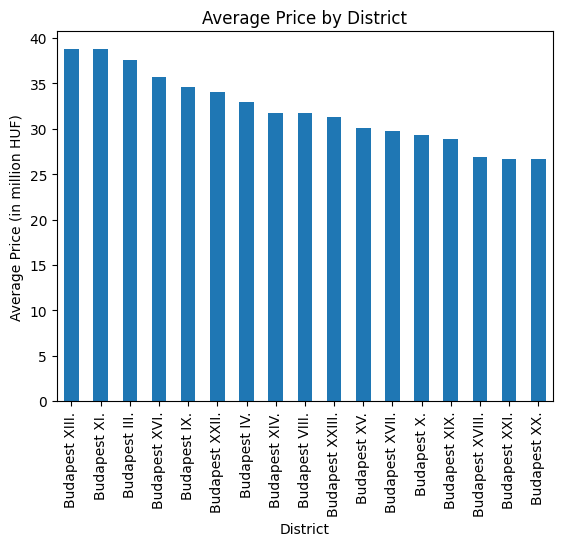

In [318]:
# Visualizing price by districts

city_prices = df.groupby('city')['price'].mean().sort_values(ascending=False)

# Create a barplot
city_prices.plot.bar()

# Set the title and labels
plt.title('Average Price by District')
plt.xlabel('District')
plt.ylabel('Average Price (in million HUF)')

# Show the plot
plt.show()


In [319]:
# Descriptive stats about the 'price' column

df['price'].describe()

# Minimum and maximum values seem to be outliers. 

count    9706.000000
mean       33.210583
std        45.648171
min         4.379200
25%        27.200000
50%        31.500000
75%        36.900000
max      4444.000000
Name: price, dtype: float64

In [320]:
# Dropping the top and bottom 0.2% of 'price' column to trim the dataset from outliers

# Finding the top and bottom cutoff values
top_cutoff = df['price'].quantile(0.998)
bottom_cutoff = df['price'].quantile(0.002)

# Filtering the dataframe using boolean indexing
df = df[(df['price'] >= bottom_cutoff) & (df['price'] <= top_cutoff)]

In [321]:
# Checking again how to min and max values have changed
df['price'].describe()

count    9666.000000
mean       32.633446
std         7.630511
min        16.980000
25%        27.212500
50%        31.500000
75%        36.800000
max        71.900000
Name: price, dtype: float64

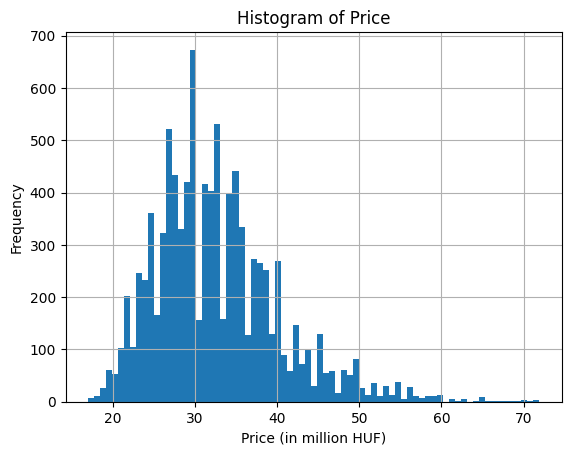

In [322]:
# Visualizing the distribution of 'price' column

df['price'].hist(bins=75)
plt.title('Histogram of Price')
plt.xlabel('Price (in million HUF)')
plt.ylabel('Frequency')
plt.show()

In [323]:
# Creating balanced intervals for the 'price' column
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-20M', '20M-30M','30M-40M', '40M-50M', '50M-60M', '60M+']

# Creating 'price_interval' column in the dataset
df['price_interval'] = pd.cut(df['price'], bins=bins, labels=labels)

# Dropping the original 'price' column
df = df.drop('price', axis=1)

In [324]:
# Checking class imbalance
df['price_interval'].value_counts()

30M-40M    4153
20M-30M    4149
40M-50M     958
50M-60M     244
0-20M       124
60M+         38
Name: price_interval, dtype: int64

In [325]:
df

,condition_type,city,room_count,area_size,balcony_size,floor,panelprogram,year_built,price_interval
0,good condition,Budapest III.,3,67,3.0,3rd,0.0,1981-2000,40M-50M
1,renovated,Budapest XVIII.,2,53,4.0,above 10,1.0,1950-1980,20M-30M
2,good condition,Budapest XIX.,1,53,3.0,ground floor,1.0,1950-1980,20M-30M
3,good condition,Budapest III.,1,57,1.0,4th,0.0,1950-1980,30M-40M
4,good condition,Budapest III.,3,66,0.0,4th,0.0,1950-1980,40M-50M
...,...,...,...,...,...,...,...,...,...
9995,good condition,Budapest XX.,2,41,0.0,10th,0.0,1981-2000,20M-30M
9996,renovated,Budapest XI.,2,74,0.0,2nd,0.0,1981-2000,60M+
9997,medium condition,Budapest IV.,3,82,0.0,2nd,0.0,1981-2000,30M-40M
9998,good condition,Budapest XI.,2,48,4.0,ground floor,0.0,1950-1980,30M-40M


In [327]:
# DUMMY VARIABLES

# Creating dummies for categorical features
df = pd.get_dummies(df, columns=['condition_type', 'city', 'floor', 'year_built'])

# Displaying the first 5 rows of the transformed dataset
df.head()


,room_count,area_size,balcony_size,panelprogram,price_interval,condition_type_good condition,condition_type_incomplete,condition_type_like new,condition_type_medium condition,condition_type_needs renovation,...,floor_8th,floor_9th,floor_above 10,floor_ground floor,floor_mezzanine floor,year_built_1950-1980,year_built_1981-2000,year_built_2001-2010,year_built_after 2010,year_built_before 1950
0,3,67,3.0,0.0,40M-50M,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,53,4.0,1.0,20M-30M,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,53,3.0,1.0,20M-30M,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,57,1.0,0.0,30M-40M,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,66,0.0,0.0,40M-50M,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [328]:
# Saving the preprocessed dataframe as a .csv file
df.to_csv('clean_df.csv', index=False)